# Goals

1. Evaluation metrics for classification
    1. Accuracy
    2. Confusion matrix
    3. ROC curve
    4. Precision / recall curve
2. Feature extraction
3. Feature selection

## Evaluation Metrics for Classifiers

**The confusion matrix** for binary classification involves a 2x2 table of values:
* True positive (tp) - true class is positive, classifier predicts positive
* True negative (tn) - true class is negative, classifier predicts negative
* False positive (fp) - true class is negative, classifier predicts positive
* False negative (fn) - true class is negative, classifier predicts positive


![](https://cdn-images-1.medium.com/max/1600/1*CPnO_bcdbE8FXTejQiV2dg.png)

The confusion matrix would show the actual counts of TP, FP, FN, TN examples.
* \# positives (p) = tp + fn (i.e., sum of column 1 above)
* \# negatives (n) = fp + tn (i.e., sum of column 2 above)


### Evaluation metrics: Beyond Accuracy

1. Accuracy: # correctly classified samples / total # of samples 
    
    $$Accuracy = \frac{tp + tn}{p+n}$$
    
2. Precision

    $$Precision = \frac{tp}{tp + fp}$$

3. Recall (a.k.a. sensitivity / true positive rate): 

    $$Recall = \frac{tp}{p}$$
    
4. Specificity (a.k.a. true negative rate)

    $$Specificity = \frac{tn}{n}$$
    
5. False positive rate = 1 - Specificity = FP / N

    $$FPR = \frac{fp}{n}$$
    

## Example: Binary confusion matrix

Classifier A       |   Positive    |  Negative  |
-----------        | ----------- | -----------  |
Predicted Positive | TP: 45      | FP: 5        |
Predicted Negative | FN: 5       | TN: 45       |

Classifier B       |   Positive    |  Negative  |
-----------        | ----------- | -----------  |
Predicted Positive | TP: 49      | FP: 9        |
Predicted Negative | FN: 1       | TN: 41       |

1. What is the total number of samples?
2. Total # of positive samples? Total # of negative samples?
3. What is the accuracy of classifier A?
4. What is the accuracy of classifier B?
5. Which classifier do you prefer for cancer diagnosis? (Positive = Cancer, Negative = No Cancer)

### Questions:

Consider the following binary classification problems:
* detecting if a patient has cancer
* detecting if an email is spam
* detecting if a tweet in English
* detecting if a review has positive or negative sentiment

For each of these examples:
1. Do we care about getting more positive or negative examples in each of these?
2. Which types of metrics are more relevant?


## Confusion matrix for multiclass classification

We can also make confusion matrices when we are working with a k-class task, where now
we have a $k\times k$ matrix, where the number of examples falling into each pair is indicated by that matrix, and the diagonal indicates the # of correctly classified examples. 

See:
1. https://en.wikipedia.org/wiki/Confusion_matrix
2. https://stats.stackexchange.com/questions/179835/how-to-build-a-confusion-matrix-for-a-multiclass-classifier

In [1]:
import pylab
import numpy as np
import pandas

## ROC Curves

An receiver operating characteristic (ROC) curve plots the false positive rate (x-axis) vs the true positive rate (y-axis), as the prediction threshold varies across the full range of possibilities.

Note that you can use use sklearn to make an ROC curve: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

To create an ROC curve manually:
1. Sort the samples by the prediction scores generated by your classifier
2. Vary the prediction threshold to make predictions and raw a point on the graph for each threshold
3. Connect all the points

Example (from: https://classeval.wordpress.com/introduction/introduction-to-the-roc-receiver-operating-characteristics-plot/):
![](https://classeval.files.wordpress.com/2015/06/a-roc-curve-connecting-points.png?w=600&h=574)

In [2]:
# let's make up a fake example: generate scores and reverse them
scores = np.linspace(0.01,0.99,500)
scores = scores[::-1] # sort them
# generate true classes
true_labels = np.random.binomial(1, scores)
results = pandas.DataFrame(data = {'true': true_labels, 'scores': scores})

In [3]:
results.head(15)

,true,scores
0,1,0.990000
1,1,0.988036
2,1,0.986072
3,1,0.984108
4,1,0.982144
5,1,0.980180
6,1,0.978216
7,1,0.976253
8,1,0.974289
9,1,0.972325


In [4]:
results.tail(15)

,true,scores
485,0,0.037495
486,0,0.035531
487,0,0.033567
488,0,0.031603
489,0,0.029639
490,0,0.027675
491,0,0.025711
492,0,0.023747
493,0,0.021784
494,0,0.019820


In [5]:
## NOTE: prediction are the predictions after thresholding the score
# compute false positives: predicted positive but were actually negative
fp = lambda true_labels, prediction: sum(true_labels[prediction==True] == 0)
# compute true positives: predicted positive and are actually positive
tp = lambda true_labels, prediction: sum(true_labels[prediction==True] == 1)

# compute fpr
fpr = lambda fp, n: fp / n
# compute tpr / recall
tpr = lambda tp, p: tp / p

# compute precision
precision = lambda tp, fp: tp /(tp+fp)

In [6]:
# generate various threshold values
thresholds = np.linspace(0,1,20)

In [7]:
thresholds

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [8]:
# compute number of positive examples
p = sum(true_labels == 1)
# compute number of negative examples
n = sum(true_labels == 0)

tprs = np.zeros(len(thresholds))
fprs = np.zeros(len(thresholds))

for i, threshold in enumerate(thresholds):
    # use this threshold to classify the scores
    prediction = scores >= threshold
    
    true_pos = tp(true_labels, prediction)
    false_pos = fp(true_labels, prediction)

    tprs[i] = tpr(true_pos, p)
    fprs[i] = fpr(false_pos, n)

In [9]:
tprs_rand = np.zeros(len(thresholds))
fprs_rand = np.zeros(len(thresholds))
scores2 = np.random.uniform(0,1,len(scores))

for i, threshold in enumerate(thresholds):
    # use this threshold to classify the scores
    prediction = scores2 >= threshold

    tprs_rand[i] = tpr(tp(true_labels, prediction), p)
    fprs_rand[i] = fpr(fp(true_labels, prediction), n)

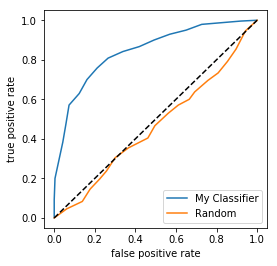

In [10]:
# square plots are good for visualizating ROC curve
fig = pylab.figure(figsize=(4, 4))
pylab.plot(fprs, tprs)

pylab.plot(fprs_rand, tprs_rand)

# add the y=x line which signifies "random" (above the line is good, below is bad)
pylab.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), ls='dashed', c='k')

# label axes
pylab.xlabel("false positive rate")
pylab.ylabel("true positive rate")

pylab.legend(["My Classifier", "Random"])

# Next steps

You can compare the ROC curves of several classifiers on one plot.

A useful measure is the **area under the ROC curve (AUC)**. This is computed by computing the area under this curve.

![](https://classeval.files.wordpress.com/2015/06/area-under-precision-recall-curve.png?w=600&h=540)

Questions: 
* What does the ROC curve of a perfect classifier look like? 
* What is the AUC of it? 
* What is the AUC of the "random" performance level?



![](https://classeval.files.wordpress.com/2015/06/auc-scores.png?w=560&h=546)

## Precision vs recall

Another thing to plot is the precision vs recall curve. Recall the definitions of precision and recall:
* Precision

    $$Precision = \frac{tp}{tp + fp}$$

* Recall (a.k.a. sensitivity / true positive rate): 

    $$Recall = \frac{tp}{p}$$

Cancer example:
* Precision: "of all patients we predicted that had cancer [tp+fp], what proportion actually had cancer [tp]?"
* Recall: "of all patients that actually had cancer [p], how many did we detect with our classifier [tp]?"

Blog post on precision, recall, accuracy:
1. https://towardsdatascience.com/precision-vs-recall-386cf9f89488
2. https://towardsdatascience.com/a-brief-journey-on-precision-and-recall-a2651ba99ac6


Here we want the curve to be in the upper RHS:

![](https://classeval.files.wordpress.com/2015/06/precision-recall-auc-scores.png?w=520&h=520)

One thing to do:
compare BOTH the ROC and precision-recall curve. Just because two classifiers have the same AUC's for ROC doesn't mean they're both good for precision-recall.

![](https://classeval.files.wordpress.com/2015/06/roc-precision-recall-auc.png?w=800&h=444)

Source: https://classeval.wordpress.com/introduction/introduction-to-the-precision-recall-plot/ (Recommend reading this blog post for details)

## Feature extraction for text

Essentially the preprocessing step to go from the raw data to a data matrix. Each feature might represent:
1. Unigram - single words
2. Bigram - two words that occur next to each other
3. Unigram + Bigram
4. n-grams

Take a look at the nltk package (that is used in the preprocessing script) for details on this.

When forming the matrix, we might represent each feature as:
* binary representation
* counts
* TF-IDF scores (reweights features): https://en.wikipedia.org/wiki/Tf%E2%80%93idf

## Feature selection for text

Basic idea / motivation for feature selection:
* select a subset of extracted features to train a model
* reduces computation time, may avoid overfitting
* reduces model complexity (see also penalized regularization methods)
* basic idea:
    1. Assign a value to each feature according to some scoring function
    2. Select the K features with the highest values
    
Techniques in scikit-learn that allow you to choose a scoring mechanism and extract the top K features.

Suggestion:
Visualize the top K features and look at them. Do they make sense?


Recommended reading:

* Stanford NLP textbook on feature selection: https://nlp.stanford.edu/IR-book/html/htmledition/feature-selection-1.html

* O'Keefe paper: https://pdfs.semanticscholar.org/4bf9/6ed718c89af435929380a1a529f6721ef2ee.pdf

* https://towardsdatascience.com/feature-selection-on-text-classification-1b86879f548e
(+ references therein)


E.g. look at feature selection approaches such as:
1. Frequency-based approaches: 
    - document frequency: number of documents with the word
    - collection frequency: the number of occurences of a term in the collection
    - select some frequent terms without considering class information: this is a simple and fast method but may include useless terms
    - categorical proportional difference (PD): Try to find terms that occur mostly in one class of documents or the other and calculate the difference between the positive document frequency and negative document frequency:
        
        $$Score = \frac{|positiveDF - negative DF|}{(positiveDF + negative DF)}$$
        
    - works well for sentiment analysis (O'Keefe & Koprinska)
2. Chi-squared feature selection: test the independence of two categorical variables: a term/feature variable and the class variable:
$$
\chi^2 = \sum_{i,j} \frac{(O_{ij} - E_{ij})^2}{E_{ij}},
$$
where $O_ij$ is the observed count and $E_{ij}$ is the expected count.

    - Can compute $\chi^2$ from the observed table
    - Higher scores indicate they are dependent
    - sklearn.feature_selection.chi2: compute the chi-squared stat between each non-negative feature and class
3. Mutual information: the measure of mutual dependence between two random variables (see: https://en.wikipedia.org/wiki/Mutual_information)
    - MI measures the amount of information shared between a term and a class
    - Question: what is the mutual information between two independent random variables?
    - How do we compute the MI given a data set?
    - sklearn.metrics.mutual_info_score